In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import load_test
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [3]:
que = load_test.load_que()

In [4]:
print(que.target)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(que.data, que.target, test_size=0.2, random_state=8)

In [6]:
Xtrain.shape

(561, 3)

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1

0.7393360160965795 1


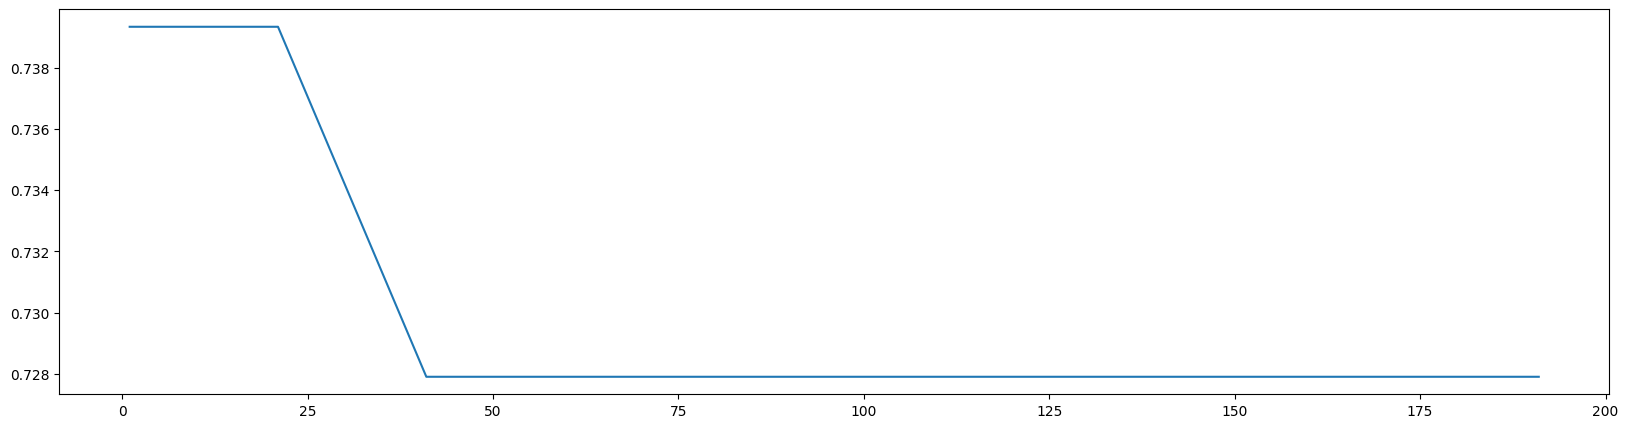

In [7]:
scorel = []
for i in range(0, 200, 10):
    gbm = LGBMClassifier(n_estimators=i + 1,
                         n_jobs=-1,
                         random_state=8)
    score = cross_val_score(gbm, que.data, que.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), (scorel.index(max(scorel)) * 10) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), scorel)
plt.show()

In [8]:
estimator = LGBMClassifier(n_estimators=1, random_state=8)
param_grid = {
    'learning_rate': np.arange(0.01, 1, 0.01)
}
GS = GridSearchCV(estimator, param_grid, cv=10)
GS.fit(que.data, que.target)

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1

GridSearchCV(cv=10, estimator=LGBMClassifier(n_estimators=1, random_state=8),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])})

In [9]:
GS.best_params_

{'learning_rate': 0.01}

In [10]:
GS.best_score_

0.7393360160965795

In [11]:
estimator = LGBMClassifier(n_estimators=1, random_state=8)
param_grid = {
    'num_leaves': np.arange(1, 128, 1)
}
GS = GridSearchCV(estimator, param_grid, cv=10)
GS.fit(que.data, que.target)

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1

GridSearchCV(cv=10, estimator=LGBMClassifier(n_estimators=1, random_state=8),
             param_grid={'num_leaves': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127])})

In [12]:
GS.best_params_

{'num_leaves': 2}

In [13]:
GS.best_score_

0.7393360160965795

In [14]:
Xtest

array([[2, 4, 1],
       [2, 3, 2],
       [2, 2, 2],
       [2, 2, 2],
       [2, 4, 1],
       [2, 3, 1],
       [2, 4, 1],
       [1, 3, 1],
       [2, 2, 1],
       [1, 4, 2],
       [2, 3, 1],
       [2, 3, 1],
       [1, 3, 1],
       [2, 3, 2],
       [2, 4, 1],
       [2, 3, 2],
       [2, 3, 1],
       [2, 2, 1],
       [2, 4, 1],
       [2, 3, 2],
       [2, 1, 2],
       [2, 3, 1],
       [1, 4, 1],
       [1, 3, 1],
       [2, 2, 2],
       [2, 4, 2],
       [1, 5, 1],
       [2, 3, 2],
       [1, 4, 2],
       [1, 3, 1],
       [2, 5, 2],
       [1, 4, 1],
       [1, 3, 1],
       [2, 4, 2],
       [2, 3, 1],
       [2, 5, 1],
       [1, 2, 2],
       [2, 2, 2],
       [1, 2, 2],
       [2, 5, 1],
       [2, 2, 2],
       [2, 3, 1],
       [2, 4, 2],
       [2, 4, 2],
       [2, 3, 1],
       [2, 3, 2],
       [1, 3, 2],
       [2, 2, 2],
       [1, 3, 1],
       [1, 2, 1],
       [2, 3, 1],
       [2, 4, 2],
       [1, 5, 1],
       [1, 5, 2],
       [2, 2, 1],
       [1,

In [15]:
Ytest

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [16]:
gbm = LGBMClassifier(num_leaves=10, learning_rate=0.01, n_estimators=1)
gbm.fit(Xtrain, Ytrain, eval_set=[(Xtest, Ytest)], early_stopping_rounds=5)
y_pred = gbm.predict(Xtest, num_iteration=gbm.best_iteration_)

[1]	valid_0's binary_logloss: 0.575308


D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argumen

In [17]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
print(accuracy_score(Ytest, y_pred))

0.7375886524822695


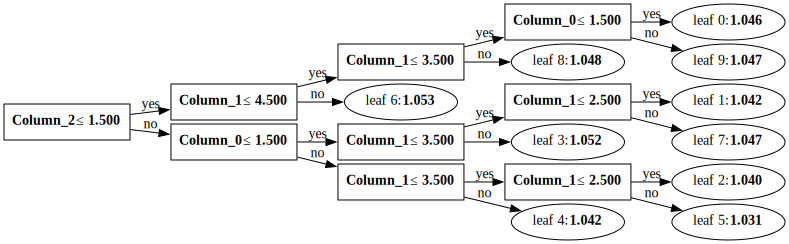

In [19]:
import lightgbm as lgb

lgb.create_tree_digraph(gbm, tree_index=0)

In [20]:
gbm.feature_importances_

array([2, 6, 1])